In [42]:
# Nik Pearce

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from bs4 import BeautifulSoup
import requests


url = 'https://www.baseball-reference.com/leagues/majors/2022.shtml'

dfs = pd.read_html(url)

team_batting = dfs[0]
team_batting = team_batting.drop([30, 31, 32])
team_batting

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,57,26.5,4.33,162,6027,5351,702,1232,262,...,.385,.689,95,2061,97,60,31,50,14,1039
1,Atlanta Braves,53,27.5,4.87,162,6082,5509,789,1394,298,...,.443,.761,111,2443,103,66,1,36,13,1030
2,Baltimore Orioles,58,27.0,4.16,162,6049,5429,674,1281,275,...,.390,.695,97,2119,95,83,12,43,10,1095
3,Boston Red Sox,54,28.8,4.54,162,6144,5539,735,1427,352,...,.409,.731,102,2268,131,63,12,50,23,1133
4,Chicago Cubs,64,27.9,4.06,162,6072,5425,657,1293,265,...,.387,.698,96,2097,130,84,19,36,16,1100
5,Chicago White Sox,44,29.3,4.23,162,6123,5611,686,1435,272,...,.387,.698,97,2172,127,73,16,35,9,1117
6,Cincinnati Reds,66,29.4,4.00,162,5978,5380,648,1264,235,...,.372,.676,83,2003,127,92,12,33,6,1020
7,Cleveland Guardians,50,25.9,4.31,162,6163,5558,698,1410,273,...,.383,.699,102,2126,115,81,22,52,36,1156
8,Colorado Rockies,43,29.1,4.31,162,6105,5540,698,1408,280,...,.398,.713,90,2203,139,61,10,40,10,1113
9,Detroit Tigers,53,27.9,3.44,162,5870,5378,557,1240,235,...,.346,.632,84,1859,108,58,10,44,8,1015


In [43]:
team_batting['IBB'] = team_batting['IBB'].astype('int')
team_batting['SB'] = team_batting['SB'].astype('int')
team_batting['CS'] = team_batting['CS'].astype('int')
team_batting['OPS'] = team_batting['OPS'].astype('float')
team_batting['HR'] = team_batting['HR'].astype('int')

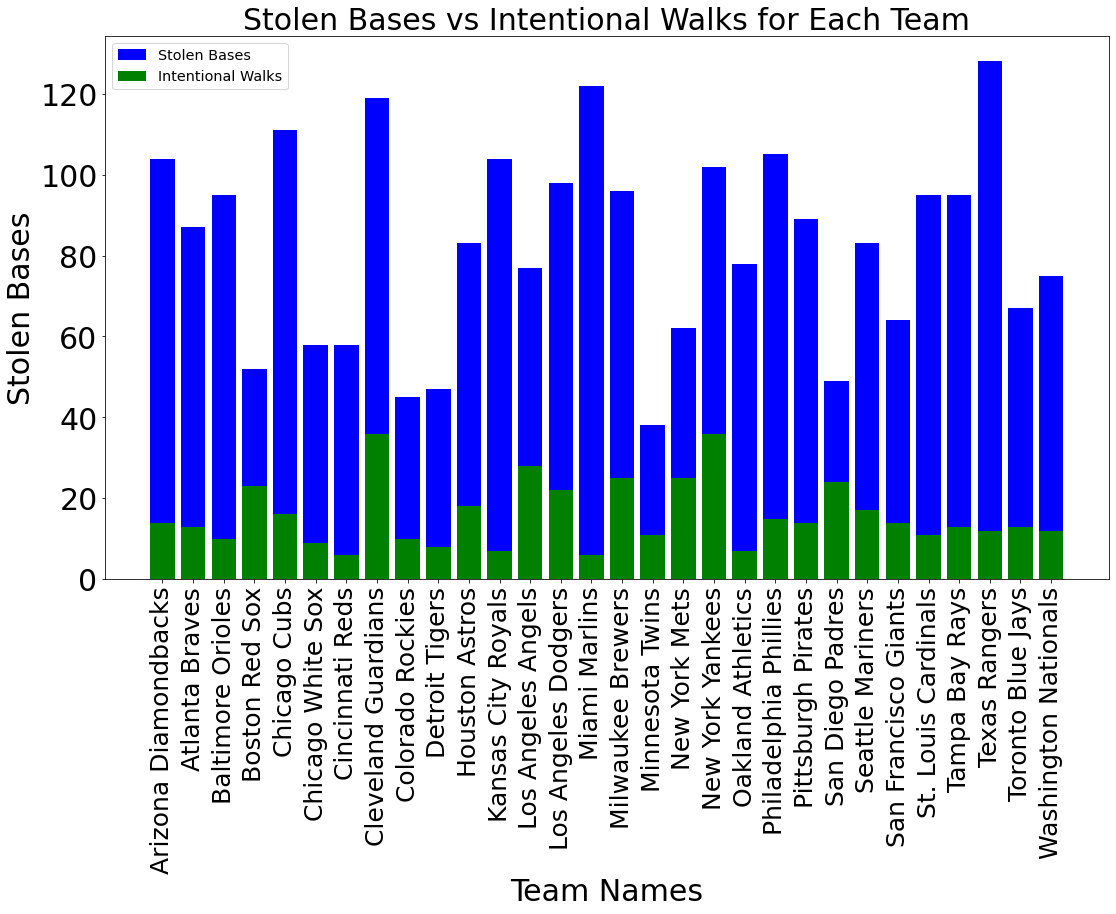

In [44]:
plt.figure(figsize=(18,10))
plt.bar(team_batting['Tm'], team_batting['SB'], color='b')
plt.bar(team_batting['Tm'], team_batting['IBB'], color='g')
plt.xticks(rotation=90, size=25)
plt.yticks(size=30)
plt.ylabel('Stolen Bases', size=30)
plt.xlabel('Team Names', size=30)
plt.title('Top 10 Teams With Highest Stoeln Bases', size=30)
plt.title('Stolen Bases vs Intentional Walks for Each Team', size=30)
plt.legend(['Stolen Bases', 'Intentional Walks'], fontsize="x-large")

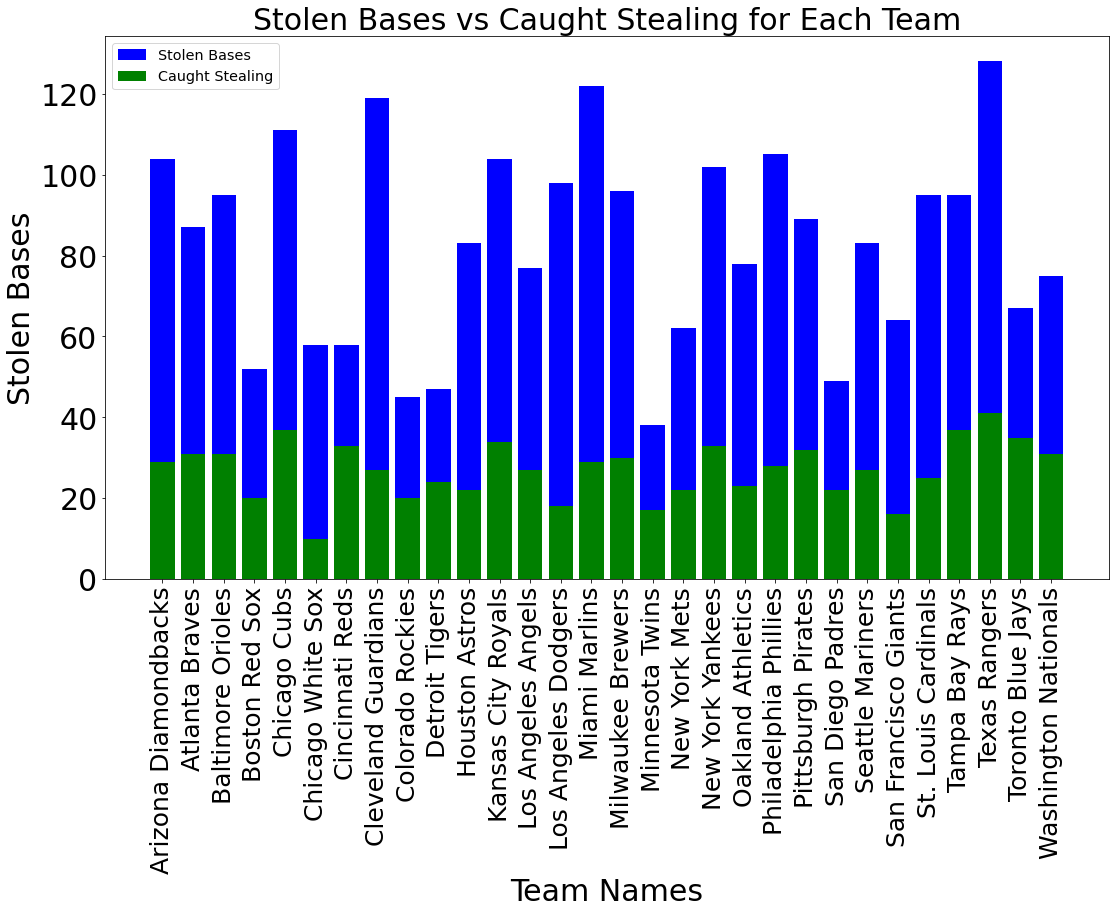

In [45]:
plt.figure(figsize=(18,10))
plt.bar(team_batting['Tm'], team_batting['SB'], color='b')
plt.bar(team_batting['Tm'], team_batting['CS'], color='g')
plt.xticks(rotation=90, size=25)
plt.yticks(size=30)
plt.ylabel('Stolen Bases', size=30)
plt.xlabel('Team Names', size=30)
plt.title('Top 10 Teams With Highest Stoeln Bases', size=30)
plt.title('Stolen Bases vs Caught Stealing for Each Team', size=30)
plt.legend(['Stolen Bases', 'Caught Stealing'], fontsize="x-large")

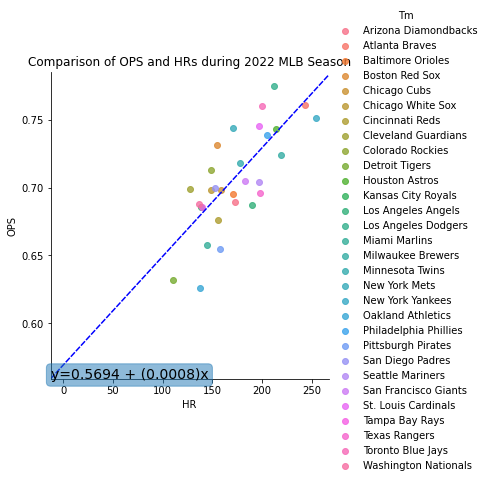

In [46]:
slope, intercept, r_value, p_value, std_err = stats.linregress(team_batting['HR'],team_batting['OPS'])
slopes = np.around(slope,4)
intercepts = np.around(intercept,4)
g = sns.lmplot(x = 'HR', y = 'OPS', data = team_batting, fit_reg = False, hue = 'Tm').set(title= 'Comparison of OPS and HRs during 2022 MLB Season')
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'y='+ str(intercepts)+' + ('+str(slopes)+')x'
a = g.ax.text(0.0, 0.0, textstr, transform=g.ax.transAxes, fontsize=14, bbox=props)
g.ax.axline(xy1 = (0,intercepts), slope=slopes, color="b", dashes = (4,1))
plt.show()